# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 3.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
274597,0.0049,0.0024,0.0024,0.0024,0.0024,0.0269,0.2954,0.5298,0.0024,0.0049,0,0,0,0
320074,0.0537,0.0024,0.0024,0.0024,0.0024,0.0049,0.3320,0.6909,0.0024,0.1733,10,0,8,0
257116,0.0342,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.1074,0.0024,0.0024,4,0,2,0
320476,0.0024,0.0049,0.0024,0.0024,0.0024,0.0024,0.0122,0.1172,0.0024,0.0024,0,0,0,0
256814,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0659,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467777 entries, 0 to 467776
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          467777 non-null  float64
 1   Emg2          467777 non-null  float64
 2   Emg3          467777 non-null  float64
 3   Emg4          467777 non-null  float64
 4   Emg5          467777 non-null  float64
 5   Emg6          467777 non-null  float64
 6   Emg7          467777 non-null  float64
 7   Emg8          467777 non-null  float64
 8   Emg9          467777 non-null  float64
 9   Emg10         467777 non-null  float64
 10  repetition    467777 non-null  int64  
 11  rerepetition  467777 non-null  int64  
 12  stimulus      467777 non-null  int64  
 13  restimulus    467777 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.0 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000,467777.000000
mean,0.110394,0.093456,0.099184,0.046686,0.013591,0.016319,0.221623,0.281546,0.083071,0.094819,3.153227,2.207094,5.587872,3.993129
std,0.276184,0.220480,0.278285,0.163785,0.057752,0.039971,0.347750,0.423341,0.256250,0.181107,3.482794,3.266631,6.575499,6.231178
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.043900,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.012200,0.002400,0.002400,0.002400,0.002400,0.002400,0.102500,0.122100,0.002400,0.017100,2.000000,0.000000,3.000000,0.000000
75%,0.087900,0.070800,0.017100,0.002400,0.002400,0.007300,0.295400,0.361300,0.009800,0.117200,6.000000,4.000000,10.000000,7.000000
max,4.665500,4.665500,4.162600,4.016100,2.270500,0.791000,4.663100,4.665500,4.523900,2.832000,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     199613
4      15514
8      15513
7      15506
2      15493
12     15490
9      15468
5      15459
6      15456
3      15450
11     15450
1      15442
10     15430
17     10356
13     10343
14     10339
15     10297
16     10268
19      5181
21      5174
18      5169
20      5133
22      5129
23      5104
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.423000,-0.446714,-0.385645,-0.300581,-0.214371,-0.377081,-0.648089,-0.584409,-0.348787,-0.519403
1,-0.423000,-0.446714,-0.385645,-0.300581,-0.214371,-0.377081,-0.648089,-0.579156,-0.348787,-0.519403
2,-0.414693,-0.446714,-0.385645,-0.300581,-0.214371,-0.377081,-0.648089,-0.573684,-0.348787,-0.494350
3,-0.423000,-0.446714,-0.385645,-0.300581,-0.214371,-0.377081,-0.648089,-0.557706,-0.348787,-0.506621
4,-0.423000,-0.446714,-0.385645,-0.300581,-0.214371,-0.377081,-0.648089,-0.562959,-0.348787,-0.519403
...,...,...,...,...,...,...,...,...,...,...
381299,-0.414693,-0.446714,-0.385645,-0.300581,-0.175124,-0.377081,-0.648089,-0.616583,-0.348787,0.117139
381300,-0.414693,-0.446714,-0.385645,-0.300581,-0.214371,-0.377081,-0.648089,-0.616583,-0.348787,0.154974
381301,-0.423000,-0.446714,-0.385645,-0.300581,-0.214371,-0.377081,-0.648089,-0.621836,-0.348787,0.167245
381302,-0.423000,-0.446714,-0.385645,-0.300581,-0.175124,-0.377081,-0.648089,-0.600386,-0.348787,0.167245


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
76/76 [==============================] - 4s 30ms/step - loss: 1.3453 - accuracy: 0.6513 - val_loss: 1.0095 - val_accuracy: 0.7218
Epoch 2/100
76/76 [==============================] - 2s 25ms/step - loss: 0.9185 - accuracy: 0.7453 - val_loss: 0.8316 - val_accuracy: 0.7661
Epoch 3/100
76/76 [==============================] - 2s 26ms/step - loss: 0.8050 - accuracy: 0.7724 - val_loss: 0.7539 - val_accuracy: 0.7843
Epoch 4/100
76/76 [==============================] - 2s 25ms/step - loss: 0.7334 - accuracy: 0.7911 - val_loss: 0.6937 - val_accuracy: 0.8013
Epoch 5/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6868 - accuracy: 0.8030 - val_loss: 0.6549 - val_accuracy: 0.8109
Epoch 6/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6528 - accuracy: 0.8115 - val_loss: 0.6295 - val_accuracy: 0.8192
Epoch 7/100
76/76 [==============================] - 2s 25ms/step - loss: 0.6248 - accuracy: 0.8198 - val_loss: 0.6026 - val_accuracy: 0.8260
Epoch 

76/76 [==============================] - 2s 26ms/step - loss: 0.3184 - accuracy: 0.9039 - val_loss: 0.3538 - val_accuracy: 0.8964
Epoch 59/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3224 - accuracy: 0.9025 - val_loss: 0.3473 - val_accuracy: 0.8967
Epoch 60/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3149 - accuracy: 0.9052 - val_loss: 0.3480 - val_accuracy: 0.8960
Epoch 61/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3112 - accuracy: 0.9061 - val_loss: 0.3511 - val_accuracy: 0.8969
Epoch 62/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3125 - accuracy: 0.9057 - val_loss: 0.3524 - val_accuracy: 0.8964
Epoch 63/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3111 - accuracy: 0.9059 - val_loss: 0.3515 - val_accuracy: 0.8960
Epoch 64/100
76/76 [==============================] - 2s 26ms/step - loss: 0.3125 - accuracy: 0.9052 - val_loss: 0.3481 - val_accuracy: 0.8966
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

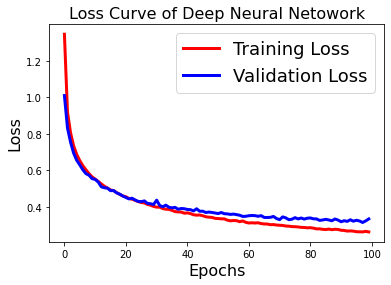

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

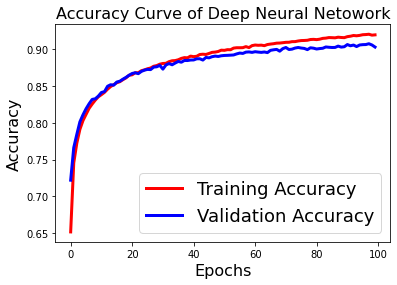

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([ 4,  1, 16, ...,  0,  7,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

1

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 90.32926397503311


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     39341
           1       0.85      0.86      0.85      2050
           2       0.91      0.85      0.88      2158
           3       0.88      0.73      0.80      2144
           4       0.92      0.91      0.91      2037
           5       0.90      0.84      0.87      2052
           6       0.93      0.88      0.90      1952
           7       0.79      0.69      0.74      2048
           8       0.85      0.84      0.84      2084
           9       0.86      0.84      0.85      1918
          10       0.87      0.78      0.82      2029
          11       0.93      0.90      0.91      1973
          12       0.82      0.80      0.81      2082
          13       0.92      0.86      0.89      1601
          14       0.75      0.81      0.78      1305
          15       0.74      0.57      0.64      1473
          16       0.89      0.83      0.86      1608
 

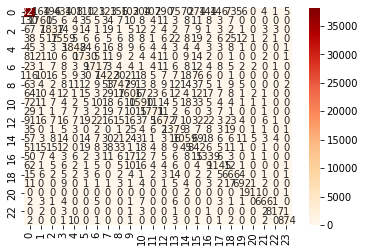

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.7279605565098806
MSE: 7.968961854683259
RMSE: 2.8229349717418675


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9016239107634163
Recall Score :  0.9032926397503311
f1_score :  0.901346994340715
